<a href="https://colab.research.google.com/github/SvetLanchY/CompLing/blob/main/Tora_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import re
import os
import os.path 

import string
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

os.getcwd()
os.listdir()

!pip install pymystem3==0.1.10
!pip install pymorphy2[fast]

from pymorphy2 import MorphAnalyzer
from pymystem3 import Mystem
mystem = Mystem() 
morph = MorphAnalyzer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [42]:
from google.colab import files #строка импорта
files.upload()

Saving torah_new_translation.txt to torah_new_translation (1).txt


{'torah_new_translation.txt': b'\xef\xbb\xbf\r\n\r\n\r\n\r\n\r\n\r\n\r\n\xd0\x91\xd0\xab\xd0\xa2\xd0\x98\xd0\x95\r\n\xd0\x91\xd0\x95\xd0\xa0\xd0\x95\xd0\xa8\xd0\x98\xd0\xa2\r\n\xd0\x92 \xd0\xbd\xd0\xb0\xd1\x87\xd0\xb0\xd0\xbb\xd0\xb5 \xd1\x81\xd0\xbe\xd1\x82\xd0\xb2\xd0\xbe\xd1\x80\xd0\xb5\xd0\xbd\xd0\xb8\xd1\x8f \xd0\x91\xd0\xbe\xd0\xb3\xd0\xbe\xd0\xbc \xd0\xbd\xd0\xb5\xd0\xb1\xd0\xb5\xd1\x81 \xd0\xb8 \xd0\xb7\xd0\xb5\xd0\xbc\xd0\xbb\xd0\xb8 \xe2\x80\x94 2\xd0\xba\xd0\xbe\xd0\xb3\xd0\xb4\xd0\xb0 \xd0\xb7\xd0\xb5\xd0\xbc- \xd0\xbb\xd1\x8f \xd0\xb1\xd1\x8b\xd0\xbb\xd0\xb0 \xd0\xb1\xd0\xb5\xd0\xb7\xd0\xb2\xd0\xb8\xd0\xb4\xd0\xbd\xd0\xb0 \xd0\xb8 \xd0\xbf\xd1\x83\xd1\x81\xd1\x82\xd0\xb0, \xd0\xb8 \xd1\x82\xd1\x8c\xd0\xbc\xd0\xb0 \xd0\xbd\xd0\xb0\xd0\xb4 \xd0\xb1\xd0\xb5\xd0\xb7\xd0\xb4\xd0\xbd\xd0\xbe\xd0\xb9, \xd0\xb8 \xd0\xb2\xd0\xb5\xd1\x82\xd0\xb5\xd1\x80 \xd0\xbc\xd0\xbe\xd0\xb3\xd1\x83\xd1\x87\xd0\xb8\xd0\xb9 \xd0\xbd\xd0\xbe\xd1\x81\xd0\xb8\xd0\xbb\xd1\x81\xd1\x8f \xd0\xbd\xd0\xb0\

In [43]:
with open('torah_new_translation.txt', encoding = "utf-8") as f:
    data = f.read()

In [59]:
def preprocess(data):
  preprocessed = data.lower()
  preprocessed = data.translate(str.maketrans('','',string.punctuation))
  preprocessed = re.sub(r'[\d+]', '', preprocessed)
  preprocessed = re.sub(r'[«,»,—,„, “]', ' ', preprocessed)
  preprocessed = re.sub(r'[\n+]', ' ', preprocessed)
  preprocessed = re.sub('   ', '', preprocessed)
  preprocessed = re.sub('  ', '', preprocessed)
  preprocessed = mystem.lemmatize(preprocessed)
  return preprocessed  
print(preprocess(data))   


['\ufeff ', 'бытие', ' ', 'берешить', ' ', 'в', ' ', 'начало', ' ', 'сотворение', ' ', 'бог', ' ', 'небо', ' ', 'и', ' ', 'земликогда', ' ', 'зем', ' ', 'ля', ' ', 'быть', ' ', 'безвидный', ' ', 'и', ' ', 'пустой', ' ', 'и', ' ', 'тьма', ' ', 'над', ' ', 'бездна', ' ', 'и', ' ', 'ветер', ' ', 'могучий', ' ', 'носиться', ' ', 'над', ' ', 'водамибог', ' ', 'сказалд', ' ', 'быть', ' ', 'светить', ' ', 'становиться', ' ', 'свет', ' ', 'бог', ' ', 'видеть', ' ', 'что', ' ', 'свет', ' ', 'хороший', ' ', 'и', ' ', 'отделять', ' ', 'свет', ' ', 'от', ' ', 'тьма', ' ', 'бог', ' ', 'называть', ' ', 'свет', ' ', 'день', ' ', 'а', ' ', 'тьма', ' ', 'называть', ' ', 'ночь', ' ', 'проходить', ' ', 'вечер', ' ', 'затем', ' ', 'утро', ' ', 'день', ' ', 'один', ' ', 'бог', ' ', 'сказалд', ' ', 'быть', ' ', 'посреди', ' ', 'вода', ' ', 'свод', ' ', 'чтобы', ' ', 'отделять', ' ', 'вода', ' ', 'от', ' ', 'водыбог', ' ', 'создавать', ' ', 'свод', ' ', 'и', ' ', 'отделять', ' ', 'вода', ' ', 'который', ' ',

In [60]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')


rustopwords = stopwords.words('russian')
rustopwords.extend(['—' , 'который', 'это', 'свой', 'весь', 'твой', 'ваш', 'наш', ' '])
data1 = [word for word in preprocess(data) if word not in rustopwords]
print(sorted(data1))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['\t', '\t', '\t', '\t', '\t', '\t', '\t', '\t ', ' \t', ' \n', ' –', ' –', ' –\t', ' – ', ' – ', ' – ', ' ‘', ' ‘', ' ‘', ' ’', ' ’', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'II', 'II', 'IIIпишет', 'Palaestina', 'Pistacia', 'QtgLevс', 'TOPA', 'TOPA', 'TOPA', 'TOPA', 'caudatus', 'caudatus', 'civis', 'dilectus', 'illе', 'ischiadicusОн', 'lobus', 'lobus', 'nervus', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'peregrinus', 'rectissimus', 'sit', 'sive', 'sive', 'Аа', 'Аа', 'Аа', 'Аа', 'Аа', 'Аа', 'Аа', 'Ааронасвя', 'Буквсвя', 'Буквя', 'Буквя', 'Ва', 'Ва', 'Ве', 'Ве', 'Ве', 'Ге', 'Господьа', 'Еф', 'Иа', 'Иа', 'Иа', 'Иа', 'Иа', 'Иа', 'Иа', 'Иа', 'Иа', 'Иа', 'Израиляа', 'Израиляיהוה', 'Ио', 'Ио', 'Ио', 'Ио', 'Ио', 'Ио', 'Ио', 'Ио', 'Ио', 'Иу', 'КИ', 'КИ', 'Ке', 'Ке', 'Ке

In [61]:
from nltk.probability import FreqDist
fdist = FreqDist(data1)
fdist.most_common(25)

[('господь', 1336),
 ('земля', 821),
 ('сказать', 792),
 ('бог', 768),
 ('сын', 641),
 ('народ', 588),
 ('давать', 486),
 ('день', 469),
 ('моисей', 466),
 ('сделать', 411),
 ('отец', 376),
 ('израиль', 359),
 ('жертва', 325),
 ('пусть', 319),
 ('ивр', 290),
 ('должный', 286),
 ('взять', 283),
 ('человек', 282),
 ('рука', 268),
 ('приносить', 266),
 ('дом', 266),
 ('год', 258),
 ('имя', 253),
 ('аарон', 253),
 ('господин', 245)]

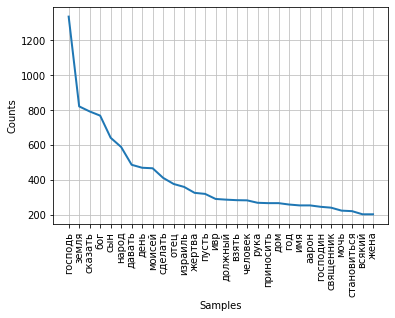

In [62]:
fdist.plot(30,cumulative=False)

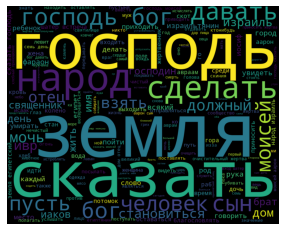

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

text_raw = " ".join(data1)
#wordcloud = WordCloud().generate(text_raw)

# wc = WordCloud().generate(text_raw)
# plt.axis("off")
# plt.imshow(wc)

wc = WordCloud(background_color="black", max_words=200, width=1000, height=800).generate(text_raw)# to recolour the image
plt.axis("off")
plt.imshow(wc)